In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score, roc_curve, mean_squared_error, r2_score, RocCurveDisplay
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,  cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import seaborn as sns


In [2]:
# Cargar el archivo csv en un DataFrame
df = pd.read_csv('/Users/juan/Library/CloudStorage/GoogleDrive-juan.sanz@asociacionbigdata.com/Unidades compartidas/Máster UMH/II TÉCNICAS ESTADÍSTICAS PARA EL APRENDIZAJE/practicas/practica Juan/garments_worker_productivity.csv', header=0, sep=",")

# Ver el shape del DataFrame, es decir, el número de filas y columnas
print("Número de filas y columnas:" + str(df.shape))

# Visualizar las primeras filas
print("Algunas filas del dataset:")
df.sample(5)

Número de filas y columnas:(1197, 15)
Algunas filas del dataset:


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
341,1/20/2015,Quarter3,sweing,Tuesday,4,0.70,22.52,983.0,10260,63,0.0,0,0,57.0,0.750068
472,1/27/2015,Quarter4,sweing,Tuesday,8,0.65,15.09,976.0,240,23,0.0,0,0,52.0,0.650307
686,2/9/2015,Quarter2,sweing,Monday,5,0.70,30.10,773.0,7020,40,0.0,0,0,58.0,0.700618
988,3/1/2015,Quarter1,sweing,Sunday,8,0.75,29.40,622.0,6240,56,0.0,0,0,57.0,0.750750
384,1/22/2015,Quarter4,finishing,Thursday,2,0.70,3.94,NaN,15000,0,0.0,0,0,25.0,0.649662


In [3]:
# Ver los tipos de datos de las columnas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe(include=['O'])

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


# Descripción de los datos
El conjunto de datos contiene 1197 filas y 15 columnas

Información de los atributos:

1. date : Fecha en MM-DD-YYYY
2. day : Día de la semana
3. quarter : Una porción del mes. Un mes se dividió en cuatro trimestres
4. department : Departamento asociado con la instancia
5. teamno : Número de equipo asociado con la instancia
6. noofworkers : Número de trabajadores en cada equipo
7. noofstylechange : Número de cambios en el estilo de un producto en particular
8. targetedproductivity : Productividad objetivo establecida por la autoridad para cada equipo cada día.
9. smv : Valor de Minuto Estándar, es el tiempo asignado para una tarea
10. wip : Trabajo en progreso. Incluye el número de artículos sin terminar para productos
11. overtime : Representa la cantidad de tiempo extra por cada equipo en minutos
12. incentive : Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción particular.
13. idletime : La cantidad de tiempo cuando la producción fue interrumpida por varias razones
14. idlemen : El número de trabajadores que estuvieron inactivos debido a la interrupción de la producción
15. actual_productivity : El porcentaje real de productividad que fue entregado por los trabajadores. Varía de 0 a 1.

Fecha, trimestre, departamento y día son tipos de datos de objeto y el resto son de tipo int o float.

In [6]:
# Comprobar si hay valores nulos
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

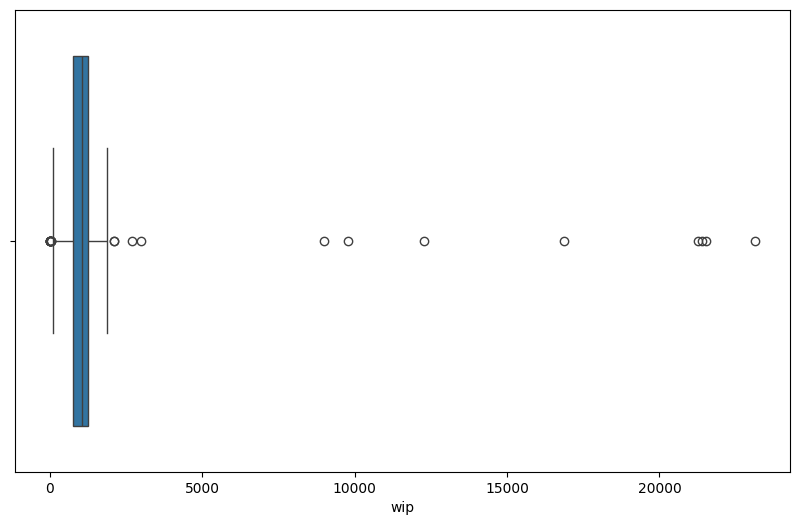

In [7]:
#visualizar en diagrama de cajas la columna wip
plt.figure(figsize=(10, 6))
sns.boxplot(x='wip', data=df)
plt.show()
    
#reemplazar valores nulos por la media en wip
#df['wip'] = df['wip'].fillna(df['wip'].mean())

#eliminar las filas de wip con valores mayores a 2000
df = df[df['wip'] <= 2000]

#eliminar filas de WIP con valores nulos
df = df.dropna(subset=['wip'])

#eliminar la colunna wip
#df = df.drop(columns=['wip'])

In [8]:
df.describe(include=['O'])

,date,quarter,department,day
count,679,679,679,679
unique,59,5,1,6
top,1/1/2015,Quarter1,sweing,Wednesday
freq,12,201,679,119


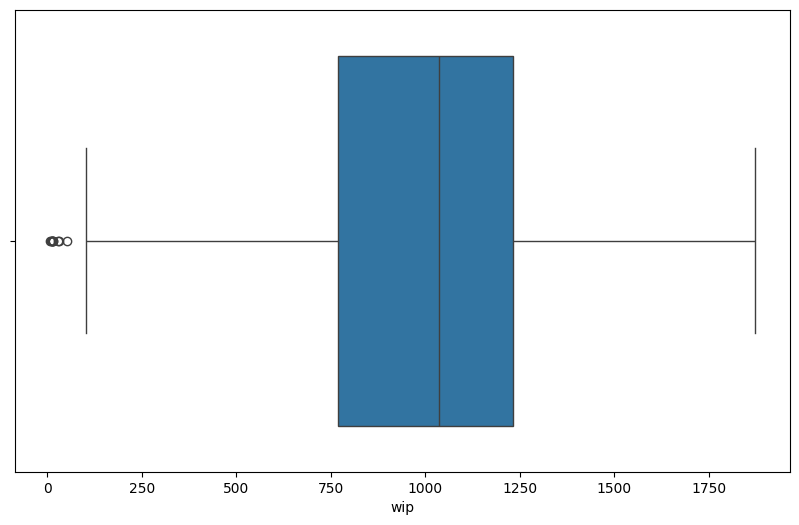

In [9]:
#visualizar en diagrama de cajas la columna wip
plt.figure(figsize=(10, 6))
sns.boxplot(x='wip', data=df)
plt.show()

In [10]:
df['department'].value_counts()

department
sweing    679
Name: count, dtype: int64

Podemos ver que, por un espacio al final las columnas "finishing" y "finishing " no están juntas, vamos arreglarlo

In [11]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing') else 'sewing')

df['department'].value_counts()

department
sewing    679
Name: count, dtype: int64

Solucionado.

In [12]:
df['day'].value_counts()

day
Wednesday    119
Thursday     118
Tuesday      117
Sunday       116
Monday       105
Saturday     104
Name: count, dtype: int64

Suponemos que el viernes no es un día laborable...

In [13]:
dept = df.department.value_counts().reset_index()
dept.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)
dept

,total_num,count
0,sewing,679


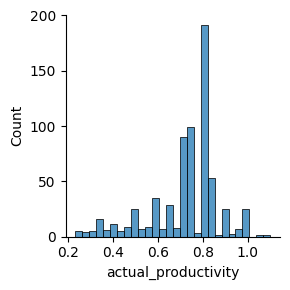

In [14]:
#visualizar la distribución de la variable 'actual_productivity'
sns.displot(df['actual_productivity'], height=3) 

# VAMOS AL LIO

In [15]:
data = df.copy()

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['quarter','department','day']),  # Aplique OneHotEncoder a las columnas categóricas
        ('num', StandardScaler(), ['team', 'over_time', 'incentive'])  # Escalar las columnas numéricas
    ],
   remainder='passthrough' # No hacer nada con las columnas no especificadas, por si acaso xd
)

In [17]:
X = data.drop(columns=['actual_productivity', 'date', 'quarter', 'department', 'day', 'team', 'no_of_workers', 'smv'])
y = data['actual_productivity']

In [18]:
# Calcular el VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                Variable        VIF
0  targeted_productivity  13.203121
1                    wip   8.641390
2              over_time   5.834826
3              incentive   5.224478
4              idle_time   1.485684
5               idle_men   1.575144
6     no_of_style_change   1.357037


In [19]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

Importancia de las Variables:
 [0.12445516 0.08736669 0.05664103 0.6929691  0.0053195  0.02190419
 0.01134433]


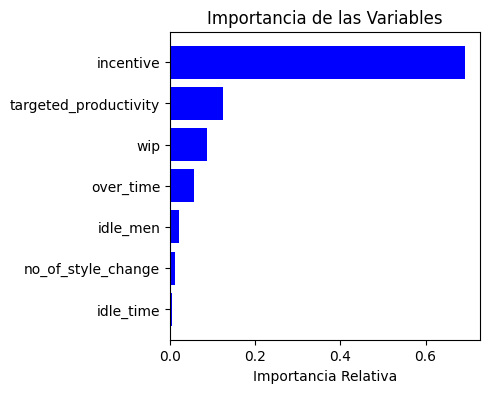

In [20]:
importancia_variables = rf_model.feature_importances_
print("Importancia de las Variables:\n", importancia_variables)

# Graficar la importancia de las variables
features = X.columns
indices = np.argsort(importancia_variables)

plt.figure(figsize=(4, 4))
plt.title("Importancia de las Variables")
plt.barh(range(len(indices)), importancia_variables[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importancia Relativa")
plt.show()

R2: 0.808102865685809
Error Mínimo Cuadrático (mse) 0.0041675364333862925


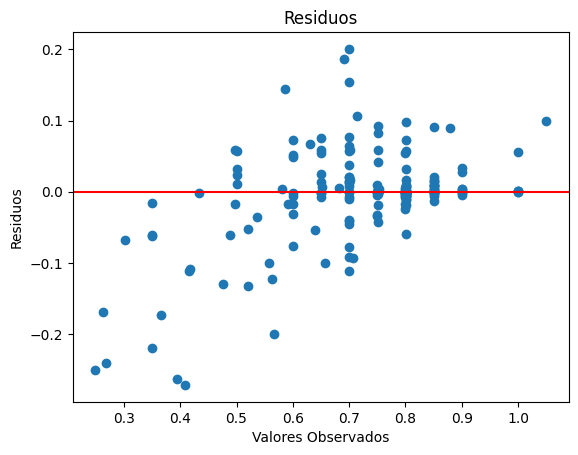

In [21]:
# Calcular el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", r2)
print("Error Mínimo Cuadrático (mse)", mse)

# Visualizar los residuos
residuos = y_test - y_pred
plt.scatter(y_test, residuos)
plt.xlabel("Valores Observados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuos")
plt.show()



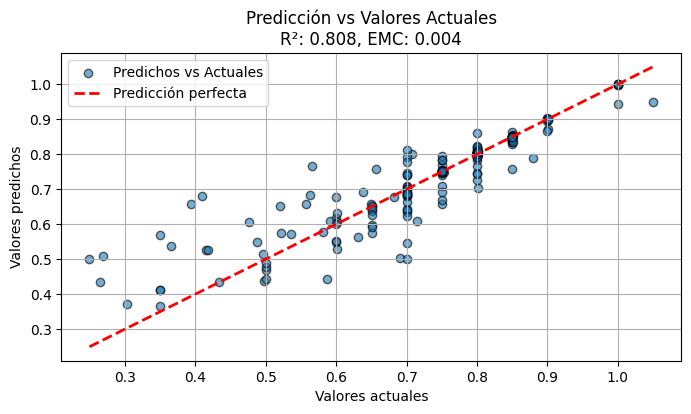

In [22]:
# Visualizar la predicción vs los valores reales
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Predichos vs Actuales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Predicción perfecta")

plt.xlabel("Valores actuales")
plt.ylabel("Valores predichos")
plt.title(f"Predicción vs Valores Actuales\nR²: {r2:.3f}, EMC: {mse:.3f}")
plt.legend()
plt.grid(True)
plt.show()

R²: 0.7920042666011334
MSE: 0.0045171586330696725


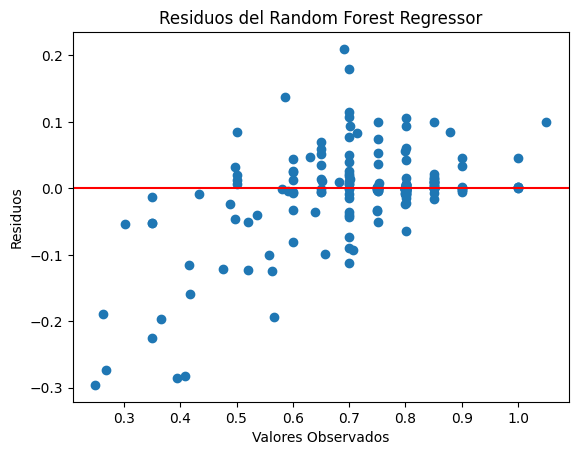

In [23]:
datos3 = df.copy()

# Definir las variables independientes y dependientes
X3 = datos3.drop(columns=['actual_productivity', 'date', 'quarter', 'department', 'day', 'team', 'no_of_workers', 'smv'])
y3 = datos3['actual_productivity']

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf_model3 = RandomForestRegressor(n_estimators=int(np.sqrt(len(X3_train))), random_state=42)

# Entrenar el modelo
rf_model3.fit(X3_train, y3_train)

# Hacer predicciones en el conjunto de prueba
y3_pred = rf_model3.predict(X3_test)

# Calcular el rendimiento del modelo
r2_rf3 = r2_score(y3_test, y3_pred)
mse_rf3 = mean_squared_error(y3_test, y3_pred)

# Mostrar los resultados
print(f"R²: {r2_rf3}")
print(f"MSE: {mse_rf3}")

# Visualizar los residuos
residuos_rf3 = y3_test - y3_pred
plt.scatter(y3_test, residuos_rf3)
plt.xlabel("Valores Observados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuos del Random Forest Regressor")
plt.show()

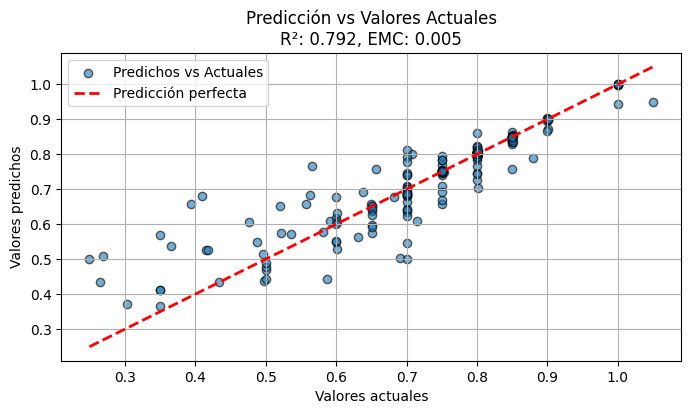

In [33]:
# Visualizar la predicción vs los valores reales
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Predichos vs Actuales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Predicción perfecta")

plt.xlabel("Valores actuales")
plt.ylabel("Valores predichos")
plt.title(f"Predicción vs Valores Actuales\nR²: {r2_rf3:.3f}, EMC: {mse_rf3:.3f}")
plt.legend()
plt.grid(True)
plt.show()

Mejores hiperparámetros: {'max_depth': 8, 'n_estimators': 32}
Mejor puntuación (MSE): 0.005081244692152218


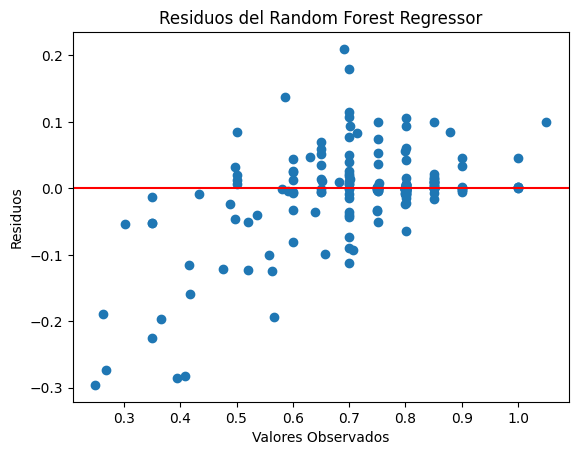

In [35]:
SEMILLA_ALEATORIEDAD = 123

#Definimos la métrica de error a optimizar
OPT = "MSE"

#Creamos un modelo Random Forest Regressor
model_rf = RandomForestRegressor(random_state=SEMILLA_ALEATORIEDAD)

#Definimos la grid search con los hiperparámetros que deseamos explorar
param_grid_rf = {
    "n_estimators": [2, 4, 8, 16, 32],# Número de árboles en el bosque
    "max_depth": [None, 1, 2, 4, 8],# Profundidad máxima de los árboles
}

#Realizamos la búsqueda de hiperparámetros utilizando la validación cruzada
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=10, refit=OPT, n_jobs=-1,
                              scoring= {"MAE": "neg_mean_absolute_error",
                                        "RMSE": "neg_root_mean_squared_error",
                                        "MSE": "neg_mean_squared_error"})

np.random.seed(SEMILLA_ALEATORIEDAD)
grid_search_rf.fit(X_train, y_train)

#Imprimimos los mejores hiperparámetros y su rendimiento
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("Mejor puntuación ("+  OPT+"):", -grid_search_rf.best_score_)

# Visualizar los residuos
residuos_rf3 = y3_test - y3_pred
plt.scatter(y3_test, residuos_rf3)
plt.xlabel("Valores Observados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuos del Random Forest Regressor")
plt.show()

R²: 0.7984309187736249
MSE: 0.0043775874655831


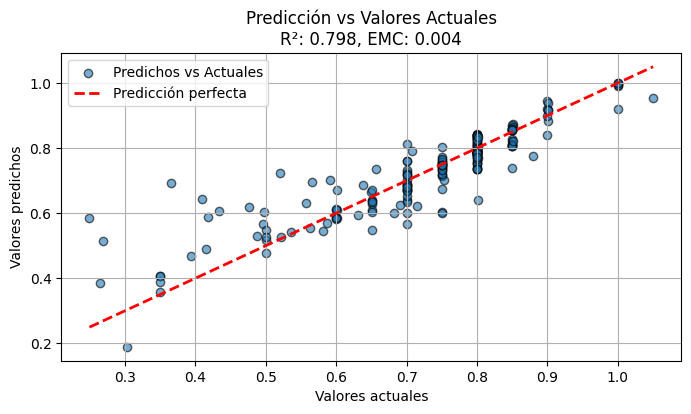

In [34]:
#REGRESIÓN LINEAL
datos2 = df.copy()
# Definir las variables independientes y dependientes
X2 = datos2.drop(columns=['actual_productivity', 'date', 'quarter', 'department', 'day', 'team', 'no_of_workers', 'smv'])
y2 = datos2['actual_productivity']

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X2_train, y2_train)

# Hacer predicciones en el conjunto de prueba
y2_pred = linear_model.predict(X2_test)

# Calcular el rendimiento del modelo
r2_linear = r2_score(y2_test, y2_pred)
mse_linear = mean_squared_error(y2_test, y2_pred)

# Mostrar los resultados
print(f"R²: {r2_linear}")
print(f"MSE: {mse_linear}")

#visualizar los resultados
# Visualizar la predicción vs los valores reales
plt.figure(figsize=(8, 4))
plt.scatter(y2_test, y2_pred, alpha=0.6, edgecolor='k', label="Predichos vs Actuales")
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2, label="Predicción perfecta")

plt.xlabel("Valores actuales")
plt.ylabel("Valores predichos")
plt.title(f"Predicción vs Valores Actuales\nR²: {r2_linear:.3f}, EMC: {mse_linear:.3f}")
plt.legend()
plt.grid(True)
plt.show()

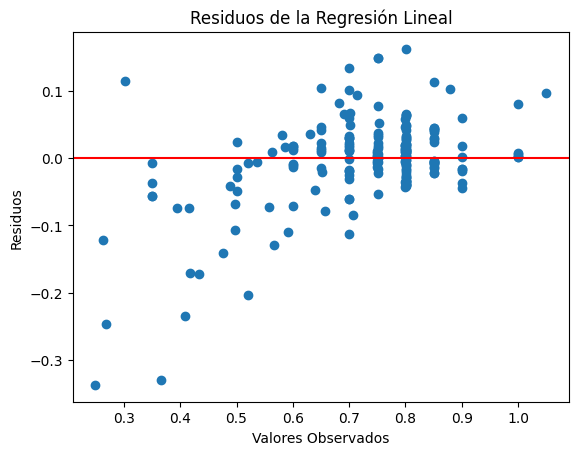

In [26]:
# Visualizar los residuos
residuos_linear = y2_test - y2_pred
plt.scatter(y2_test, residuos_linear)
plt.xlabel("Valores Observados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuos de la Regresión Lineal")
plt.show()

In [27]:
# Creamos un modelo de regresión lineal
model_lr = LinearRegression()

# Definimos la grid search con los hiperparámetros que deseamos explorar
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Realizamos la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=10, refit=OPT, n_jobs=-1,
                           scoring={"MAE": "neg_mean_absolute_error",
                                    "RMSE": "neg_root_mean_squared_error",
                                    "MSE": "neg_mean_squared_error"
                                    }
                           )
np.random.seed(SEMILLA_ALEATORIEDAD)
grid_search_lr.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros y su rendimiento
print("Mejores hiperparámetros:", grid_search_lr.best_params_)
print("Mejor puntuación ("+ OPT +"):", -grid_search_lr.best_score_)

Mejores hiperparámetros: {'fit_intercept': True, 'positive': False}
Mejor puntuación (MSE): 0.005583519852088934


In [28]:
#Guardamos los resultados de la búsqueda de hiperparámetros de RandomForest en un DataFrame
rf_gscv_df = pd.DataFrame(grid_search_rf.cv_results_)

rf_gscv_df["mean_test_MAE"] = -rf_gscv_df["mean_test_MAE"]
rf_gscv_df["mean_test_MSE"] = -rf_gscv_df["mean_test_MSE"]
rf_gscv_df["mean_test_RMSE"] = -rf_gscv_df["mean_test_RMSE"]

#Ordenamos los valores según mean_test_RMSE
rf_gscv_df = rf_gscv_df.sort_values(by="mean_test_"+OPT, ignore_index=True, ascending=True)

#Guardamos los resultados de la búsqueda de hiperparámetros de LinearRegressor en un DataFrame
lr_gscv_df = pd.DataFrame(grid_search_lr.cv_results_)

lr_gscv_df["mean_test_MAE"] = -lr_gscv_df["mean_test_MAE"]
lr_gscv_df["mean_test_MSE"] = -lr_gscv_df["mean_test_MSE"]
lr_gscv_df["mean_test_RMSE"] = -lr_gscv_df["mean_test_RMSE"]

#Ordenamos los valores según mean_test_RMSE
lr_gscv_df = lr_gscv_df.sort_values(by="mean_test_"+OPT, ignore_index=True, ascending=True)

#Añadimos una nueva columna con el modelo considerado en cada búsqueda a los dataframes de las búsquedas de hiperparámetros
rf_gscv_df["model"] = "RandomForest"
lr_gscv_df["model"] = "LinearRegressor"

#Creamos el nuevo DataFrame con la combinación de los dos dataframes anteriores
df_gscv = pd.concat([rf_gscv_df, lr_gscv_df], ignore_index=True)
df_gscv[["model", "params", "mean_test_MAE", "mean_test_MSE", "mean_test_RMSE"]]

,model,params,mean_test_MAE,mean_test_MSE,mean_test_RMSE
0,RandomForest,"{'max_depth': 8, 'n_estimators': 32}",0.038070,0.005081,0.070324
1,RandomForest,"{'max_depth': 8, 'n_estimators': 16}",0.038793,0.005208,0.071411
2,RandomForest,"{'max_depth': None, 'n_estimators': 32}",0.038580,0.005349,0.072191
3,RandomForest,"{'max_depth': 8, 'n_estimators': 8}",0.039579,0.005421,0.073147
4,RandomForest,"{'max_depth': 4, 'n_estimators': 32}",0.045371,0.005562,0.073523
5,RandomForest,"{'max_depth': None, 'n_estimators': 16}",0.039632,0.005576,0.073955
6,RandomForest,"{'max_depth': 4, 'n_estimators': 16}",0.045662,0.005695,0.074522
7,RandomForest,"{'max_depth': 8, 'n_estimators': 4}",0.041349,0.005738,0.075073
8,RandomForest,"{'max_depth': None, 'n_estimators': 8}",0.040667,0.005856,0.076108
9,RandomForest,"{'max_depth': 4, 'n_estimators': 4}",0.046658,0.005913,0.076130


In [29]:
# Creamos un modelo con los hiperparámetros de la mejor configuración de la búsqueda de hiperparámetros
# En este caso, corresponde con un RandomForest
best_model = RandomForestRegressor(random_state=SEMILLA_ALEATORIEDAD, **grid_search_rf.best_params_)

# Entrenamos el modelo con todo el conjunto de datos
np.random.seed(SEMILLA_ALEATORIEDAD)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=32, random_state=123)

In [30]:
# Obtenemos las predicciones del modelo en el conjunto de train
predictions = best_model.predict(X_train)

# Calculamos el RMSE en el conjunto de train a partir de las predicciones de nuestro modelo y los datos reales
mse = mean_squared_error(y_train, predictions)

print("MSE en el conjunto de entrenamiento: "+str(mse))

MSE en el conjunto de entrenamiento: 0.001163489260963974


In [31]:
# Obtenemos las predicciones del modelo en test
predictions = best_model.predict(X_test)

# Calculamos el RMSE en el conjunto de test a partir de las predicciones de nuestro modelo y los datos reales
mse = mean_squared_error(y_test, predictions)

print("MSE en test: "+str(mse))


MSE en test: 0.004255027376429716


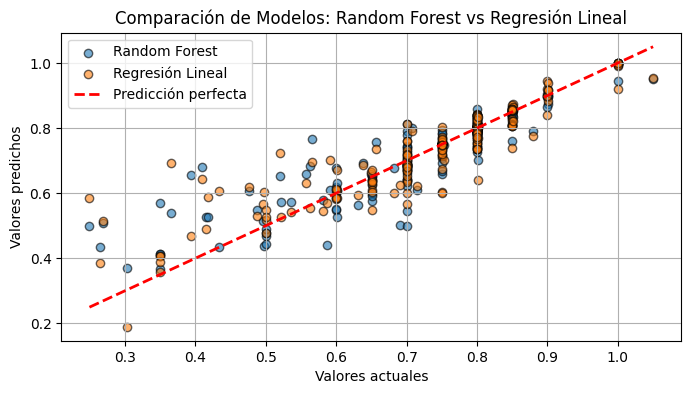

In [38]:
# Visualizar la predicción vs los valores reales
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Random Forest")
plt.scatter(y2_test, y2_pred, alpha=0.6, edgecolor='k', label="Regresión Lineal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Predicción perfecta")
plt.xlabel("Valores actuales")
plt.ylabel("Valores predichos")
plt.title("Comparación de Modelos: Random Forest vs Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
287,1/17/2015,Quarter3,sewing,Saturday,1,0.80,48.68,171.0,10620,63,0.0,0,0,59.0,0.800117
342,1/20/2015,Quarter3,sewing,Tuesday,10,0.70,22.52,1108.0,10080,63,0.0,0,0,56.0,0.750057
619,2/5/2015,Quarter1,sewing,Thursday,1,0.80,22.52,1485.0,6900,113,0.0,0,0,57.5,1.000019
1145,3/9/2015,Quarter2,sewing,Monday,8,0.65,30.48,953.0,6720,26,0.0,0,1,56.0,0.650421
1086,3/5/2015,Quarter1,sewing,Thursday,6,0.35,22.53,1450.0,2640,0,0.0,0,1,39.0,0.263694
354,1/21/2015,Quarter3,sewing,Wednesday,4,0.75,22.52,825.0,10080,94,0.0,0,0,56.0,0.900556
658,2/8/2015,Quarter2,sewing,Sunday,1,0.80,22.52,1615.0,6780,88,0.0,0,0,56.5,0.900136
1015,3/2/2015,Quarter1,sewing,Monday,6,0.75,18.79,947.0,2880,34,0.0,0,0,33.0,0.750797
162,1/10/2015,Quarter2,sewing,Saturday,1,0.80,26.16,1335.0,10620,63,0.0,0,0,59.0,0.800117
290,1/17/2015,Quarter3,sewing,Saturday,4,0.70,22.52,825.0,10170,50,0.0,0,0,56.5,0.700542
